# torch basic

In [2]:
!pip install torch

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.


## tensor

In [3]:
import torch

x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [4]:
# 랭크 늘리기
x = torch.unsqueeze(x, 1) # 인덱스는 앞부터 0, 1, 2, -1(마지막 차원)
#x = x.unsqueeze(0)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3]],

        [[4, 5, 6]],

        [[7, 8, 9]]])
Size: torch.Size([3, 1, 3])
Shape: torch.Size([3, 1, 3])
랭크(차원): 3


In [5]:
# 랭크 줄이기
x = torch.squeeze(x) # 크기가 1인 차원을 모두 제거한다
#x = x.squeeze()
print(x)
print("Size:", x.size())
print("Shape:", x.shape) #[3, 3] 2개의 차원에 각 3개의 원소를 가진 텐서
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [6]:
import torch
import numpy as np

array = [[1,2], [3, 4]]
x = torch.tensor(array)
print(x)
#x = torch.from_numpy(array)
x = torch.LongTensor(array)
print(x)
x = torch.Tensor(array)
print(x)
x = torch.FloatTensor(array)
print(x)
x = np.array([[1,2], [3, 4]])
print(x)

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])
[[1 2]
 [3 4]]


## view

In [7]:
x = torch.randint(1, 10, size=(3,3))
print(x.shape)

print('x.view(2,4)')
try:
    x = x.view(2,4)
except Exception as e:
    print(e) #에러 출력

print('x.view(1,9)')
try:
    x = x.view(1,9)
    print(x)
except Exception as e:
    print(e) #에러 출력
    
print('x.view(1,-1)')
try:
    x = x.view(1,-1)
    print(x)
except Exception as e:
    print(e) #에러 출력
    
print('x.view(-1,1)')
try:
    x = x.view(-1,1)
    print(x)
except Exception as e:
    print(e) #에러 출력

torch.Size([3, 3])
x.view(2,4)
shape '[2, 4]' is invalid for input of size 9
x.view(1,9)
tensor([[6, 2, 4, 6, 4, 5, 8, 7, 5]])
x.view(1,-1)
tensor([[6, 2, 4, 6, 4, 5, 8, 7, 5]])
x.view(-1,1)
tensor([[6],
        [2],
        [4],
        [6],
        [4],
        [5],
        [8],
        [7],
        [5]])


## requires_grad

In [8]:
import torch

x = torch.FloatTensor(2, 2)
y = torch.FloatTensor(2, 2)

y.requires_grad_(True) # 향후 gradient를 계산하기 위해 이 tensor가 포함된 모든 연산을 추적(track)한다
z = ( x + y ) + torch.Tensor(2, 2)
print(z)

tensor([[-4.3132e+23,  9.1466e-41],
        [-2.1566e+23,  4.5733e-41]], grad_fn=<AddBackward0>)


In [9]:
import torch

x = torch.FloatTensor(2, 2)
y = torch.FloatTensor(2, 2)

y.requires_grad_(True)
with torch.no_grad(): # 이 연산은 추적하지 않는다
    z = ( x + y ) + torch.Tensor(2, 2)
print(z)

tensor([[ 1.4022e+28,  9.1466e-41],
        [-2.1566e+23,  4.5733e-41]])


In [10]:
import torch

w = torch.tensor(2.0, requires_grad=True)

In [11]:
a = w*3 # 3 
l = a**2 # 9
l.backward() # l = (w*3)^2 = 9w^2
print(w.grad) # 미분하면 9 * 2w = 18w
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(36.)
l을 w로 미분한 값은 36.0


In [12]:
w = torch.tensor(1.0, requires_grad=True)
a = w*3 # 3 
l = a**2 # 9
l.backward() # l = (w*3)^2 = 9w^2
print(w.grad) # 미분하면 9 * 2w = 18w
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(18.)
l을 w로 미분한 값은 18.0


In [13]:
w = torch.tensor(-1.0, requires_grad=True)
a = w*3 # 3 
l = a**2 # 9
l.backward() # l = (w*3)^2 = 9w^2
print(w.grad) # 미분하면 9 * 2w = 18w
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(-18.)
l을 w로 미분한 값은 -18.0


In [14]:
w = torch.tensor(-2.0, requires_grad=True)
a = w*3 # 3 
l = a**2 # 9
l.backward() # l = (w*3)^2 = 9w^2
print(w.grad) # 미분하면 9 * 2w = 18w
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(-36.)
l을 w로 미분한 값은 -36.0


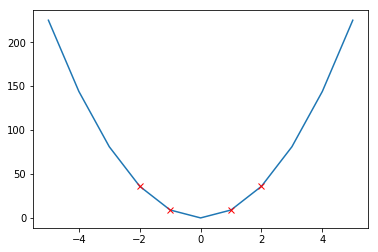

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [a for a in range(-5, 6)]
y = [9 * (b * b) for b in range(-5, 6)]

plt.plot(x, y) # 전체 값의 그래프
for i in [-2, -1, 1, 2]:
    plt.plot(i, 9 * (i*i), 'rx')
plt.show()

tensor(-36.)
tensor(-29.5200)
tensor(-24.2064)
tensor(-19.8492)
tensor(-16.2764)
tensor(-13.3466)
tensor(-10.9442)
tensor(-8.9743)
tensor(-7.3589)
tensor(-6.0343)
tensor(-4.9481)
tensor(-4.0575)
tensor(-3.3271)
tensor(-2.7282)
tensor(-2.2372)
tensor(-1.8345)
tensor(-1.5043)
tensor(-1.2335)
tensor(-1.0115)
tensor(-0.8294)


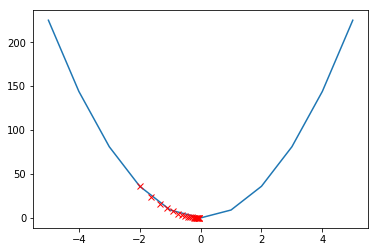

In [16]:
# 임의의 x로부터 y가 최소화 되는 위치를 찾는다. 통상 ML에서 x는 param, y는 loss이다.

import matplotlib.pyplot as plt

w = 9
lr = 0.01
x = [a for a in range(-5, 6)]
y = [w * (b * b) for b in range(-5, 6)]

plt.plot(x, y) # 전체 값의 그래프

px = torch.tensor(-2.0)

for i in range(20):
    px.requires_grad = True
    py = w * (px * px)
    plt.plot(float(px), float(py), 'rx')
    py.backward()
    grad = px.grad
    print(grad)
    with torch.no_grad():
        px = px - grad * lr

tensor(36.)
tensor(29.5200)
tensor(24.2064)
tensor(19.8492)
tensor(16.2764)
tensor(13.3466)
tensor(10.9442)
tensor(8.9743)
tensor(7.3589)
tensor(6.0343)
tensor(4.9481)
tensor(4.0575)
tensor(3.3271)
tensor(2.7282)
tensor(2.2372)
tensor(1.8345)
tensor(1.5043)
tensor(1.2335)
tensor(1.0115)
tensor(0.8294)


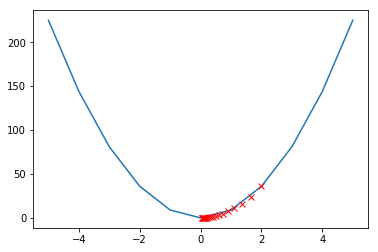

In [17]:
# 임의의 x로부터 y가 최소화 되는 위치를 찾는다. 통상 ML에서 x는 param, y는 loss이다.

import matplotlib.pyplot as plt

w = 9
lr = 0.01
x = [a for a in range(-5, 6)]
y = [w * (b * b) for b in range(-5, 6)]

plt.plot(x, y) # 전체 값의 그래프

px = torch.tensor(2.0)

for i in range(20):
    px.requires_grad = True
    py = w * (px * px)
    plt.plot(float(px), float(py), 'rx')
    py.backward()
    grad = px.grad
    print(grad)
    with torch.no_grad():
        px = px - grad * lr

tensor(36.)
tensor(29.5200)
tensor(24.2064)
tensor(19.8492)
tensor(16.2764)
tensor(13.3466)
tensor(10.9442)
tensor(8.9743)
tensor(7.3589)
tensor(6.0343)
tensor(4.9481)
tensor(4.0575)
tensor(3.3271)
tensor(2.7282)
tensor(2.2372)
tensor(1.8345)
tensor(1.5043)
tensor(1.2335)
tensor(1.0115)
tensor(0.8294)


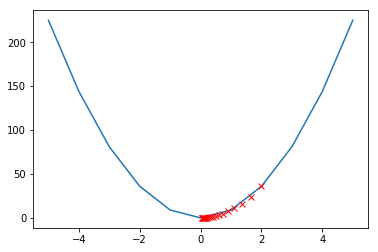

In [18]:
import matplotlib.pyplot as plt

w = 9
lr = 0.01
param = [a for a in range(-5, 6)]
loss = [w * (b * b) for b in range(-5, 6)]

plt.plot(param, loss) # 전체 값의 그래프

p_param = torch.tensor(2.0)

for i in range(20):
    p_param.requires_grad = True # param에 대한 연산을 track
    p_loss = w * (p_param * p_param) # loss를 계산한다(계산식은 여러가지)
    plt.plot(float(p_param), float(p_loss), 'rx') 
    p_loss.backward() # loss에 대한 param의 기울기를 구한다
    grad = p_param.grad
    print(grad)
    with torch.no_grad():
        p_param = p_param - grad * lr # 기울기의 반대쪽으로 lr만큼 이동한다. pytorch에서 이 과정은 optimizer가 담당한다. 

## tensor operations

In [19]:
import torch

w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0], [3.0,4.0], [5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])


In [20]:
b = torch.randn(5,2, dtype=torch.float)
print("b:", b.size())

b: torch.Size([5, 2])


In [21]:
wx = torch.mm(w,x) # w의 행은 5, x의 열은 2, 즉 shape는 [5, 2]
print("wx size:", wx.size())

wx size: torch.Size([5, 2])


In [22]:
result = wx + b
print("result size:", result.size()) 

result size: torch.Size([5, 2])


## broadcasting 

In [23]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1.shape, m2.shape)
print(m1 + m2)

torch.Size([1, 2]) torch.Size([1, 2])
tensor([[5., 5.]])


In [24]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1.shape, m2.shape)
print(m1 + m2)

torch.Size([1, 2]) torch.Size([1])
tensor([[4., 5.]])


In [25]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
print(m1.shape)
m2 = torch.FloatTensor([[3], [4]])
print(m2.shape)
print(m1 + m2)

torch.Size([1, 2])
torch.Size([2, 1])
tensor([[4., 5.],
        [5., 6.]])


## mean

In [26]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [27]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.mean())

tensor([[1., 2.],
        [3., 4.]])
tensor(2.5000)


In [28]:
print(t.mean(dim=0))
print(t.mean(dim=1))
print(t.mean(dim=-1))

tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


## max / argmax

In [29]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.shape)

tensor([[1., 2.],
        [3., 4.]])
torch.Size([2, 2])


In [30]:
print(t.max()) # Returns one value: max
print(t.max(dim=0)) # Returns two values: max and argmax

tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [31]:
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])
print('Argmax: ', t.argmax(dim=0))

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])
Argmax:  tensor([1, 1])


In [32]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


## linear regression

In [33]:
import torch

def linear(x, W, b):
    y = torch.mm(x, W) + b # mm: [n, m] x [m,p] = [n,p]
    return y

x = torch.randint(0,10,size=(3,2))
W = torch.randint(0,10,size=(2,4))
b = torch.randint(0,10,size=(4,))

y = linear(x, W, b) # [3, 2] X [2, 4] = [3, 4] + [4] = [3, 4] + [3, 4] = [3, 4]

print(x.shape)
print(W.shape)
print(b.shape)
print(y.shape)

torch.Size([3, 2])
torch.Size([2, 4])
torch.Size([4])
torch.Size([3, 4])


In [34]:
print(torch.mm(x, W))
print(b)
print(y)

tensor([[34, 36, 11, 93],
        [ 2,  2,  1,  9],
        [14, 14,  7, 63]])
tensor([7, 5, 3, 2])
tensor([[41, 41, 14, 95],
        [ 9,  7,  4, 11],
        [21, 19, 10, 65]])


## basic linear 

In [35]:
import torch
import torch.nn as nn

class MyLinear(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.W = torch.FloatTensor(input_size, output_size)
        self.b = torch.FloatTensor(output_size)
    
    def forward(self, x):
        y = torch.mm(x, self.W) + self.b
        
        return y
    
x = torch.FloatTensor(16, 10)
linear = MyLinear(10, 5)
y = linear(x)

params =[p.size() for p in linear.parameters()]
print(params)

[]


In [36]:
import torch
import torch.nn as nn

class MyLinear(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.W = nn.Parameter(torch.FloatTensor(input_size, output_size), requires_grad=True)
        self.b = nn.Parameter(torch.FloatTensor(output_size), requires_grad=True)
    
    def forward(self, x):
        y = torch.mm(x, self.W) + self.b
        
        return y
    
x = torch.FloatTensor(16, 10)
linear = MyLinear(10, 5)
y = linear(x)

params =[p.size() for p in linear.parameters()]
print(params) # w, b를 추적. y로부터 미분한 기울기를 구할 수 있다

[torch.Size([10, 5]), torch.Size([5])]


In [37]:
import torch
import torch.nn as nn

class MyLinear(nn.Module):
    def __init__(self, input_size, output_size):
        super(MyLinear, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        y = self.linear(x)
        
        return y
    
x = torch.FloatTensor(16, 10)
linear = MyLinear(10, 5)
y = linear(x)

params =[p.size() for p in linear.parameters()]
print(params)
print(linear)

[torch.Size([5, 10]), torch.Size([5])]
MyLinear(
  (linear): Linear(in_features=10, out_features=5, bias=True)
)


In [38]:
objective = 100

x = torch.FloatTensor(16, 10)
linear = MyLinear(10, 5)
y = linear(x)
loss = (objective - y.sum())

loss.backward() # gt에서 y를 뺀 것이므로 역시 추적 대상, 여기서의 미분값을 계산

In [39]:
# Training...
linear.eval()
# Do some inference process.
linear.train()
# Restart training, again.

MyLinear(
  (linear): Linear(in_features=10, out_features=5, bias=True)
)

In [40]:
import random

import torch
import torch.nn as nn

class MyModel(nn.Module):

    def __init__(self, input_size, output_size):
        super(MyModel, self).__init__()

        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        y = self.linear(x)

        return y

In [41]:
def ground_truth(x):
    return 3 * x[:, 0] + x[:, 1] - 2 * x[:, 2]

In [42]:
def train(model, x, y, optim):
    # initialize gradients in all parameters in module.
    optim.zero_grad()# backward()는 계속 값을 누적하므로 매번 gradient를 0으로 만들어야 한다.

    # feed-forward
    y_hat = model(x)
    # get error between answer and inferenced.
    loss = ((y - y_hat)**2).sum() / x.size(0) # 직접 계산할 수도 있고 pytorch에서 제공하는 loss function을 사용할 수도 있다.

    # back-propagation
    loss.backward()

    # one-step of gradient descent
    optim.step()

    return loss.data

In [46]:
batch_size = 1
n_epochs = 1000
n_iter = 10000

model = MyModel(3, 1)
optim = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.1)

print(model)

MyModel(
  (linear): Linear(in_features=3, out_features=1, bias=True)
)


In [47]:
for epoch in range(n_epochs):
    avg_loss = 0

    for i in range(n_iter):
        x = torch.rand(batch_size, 3)
        y = ground_truth(x.data)

        loss = train(model, x, y, optim)

        avg_loss += loss
    avg_loss = avg_loss / n_iter

    # simple test sample to check the network.
    x_valid = torch.FloatTensor([[.3, .2, .1]])
    y_valid = ground_truth(x_valid.data)

    model.eval()
    y_hat = model(x_valid)
    model.train()

    print(avg_loss, y_valid.data[0], y_hat.data[0, 0])

    if avg_loss < .1: # finish the training if the loss is smaller than .1.
        break

tensor(0.9999) tensor(0.9000) tensor(0.5607)
tensor(0.6331) tensor(0.9000) tensor(0.6285)
tensor(0.4336) tensor(0.9000) tensor(0.6787)
tensor(0.2967) tensor(0.9000) tensor(0.7353)
tensor(0.2117) tensor(0.9000) tensor(0.7567)
tensor(0.1417) tensor(0.9000) tensor(0.7880)
tensor(0.1014) tensor(0.9000) tensor(0.8097)
tensor(0.0686) tensor(0.9000) tensor(0.8275)


In [ ]:
# Note that tensor is declared in torch.cuda.
#x = torch.cuda.FloatTensor(16, 10)
#linear = MyLinear(10, 5)
# .cuda() let module move to GPU memory.
#linear.cuda()
#y = linear(x)

## torch application basic

In [48]:
# import 패키지

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [49]:
class MyModel(nn.Module):
    def __init__(self, X_dim, y_dim):
        super(MyModel, self).__init__()
        layer1 = nn.Linear(X_dim, 128)
        activation1 = nn.ReLU()
        layer2 = nn.Linear(128, y_dim)
        self.module = nn.Sequential(
            layer1,
            activation1,
            layer2
        )
        
    def forward(self, x):
        out = self.module(x)
        result = F.softmax(out, dim=1)
        return result        

In [ ]:
## pytorch 어플리케이션의 기본 구조

#for input, target in dataset:
#    optimizer.zero_grad()
#    output = model(input)
#    loss = loss_fn(output, target)
#    loss.backward()
#    optimizer.step()